In [1]:
#Importar pandas
import pandas as pd

In [2]:
#Cargar el dataset
data = pd.read_excel("Data2.xlsx")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   eess_diresa      16 non-null     object 
 1   id_persona       16 non-null     float64
 2   edad             16 non-null     float64
 3   Peso             16 non-null     float64
 4   Altura           16 non-null     float64
 5   sexo             16 non-null     object 
 6   flag_uci         16 non-null     float64
 7   con_oxigeno      16 non-null     float64
 8   con_ventilacion  10 non-null     float64
 9   flag_vacuna      16 non-null     float64
dtypes: float64(8), object(2)
memory usage: 1.6+ KB


In [7]:
#Eliminar todas las filas que tengan un elemento nulo
datalimpia = data.dropna()
datalimpia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 9 to 18
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   eess_diresa      10 non-null     object 
 1   id_persona       10 non-null     float64
 2   edad             10 non-null     float64
 3   Peso             10 non-null     float64
 4   Altura           10 non-null     float64
 5   sexo             10 non-null     object 
 6   flag_uci         10 non-null     float64
 7   con_oxigeno      10 non-null     float64
 8   con_ventilacion  10 non-null     float64
 9   flag_vacuna      10 non-null     float64
dtypes: float64(8), object(2)
memory usage: 880.0+ bytes


In [9]:
#Eliminar los nulos de las filas que me interesan
datalimpia = data.dropna(subset=['id_persona','edad','Peso','flag_uci'])
datalimpia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 0 to 18
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   eess_diresa      16 non-null     object 
 1   id_persona       16 non-null     float64
 2   edad             16 non-null     float64
 3   Peso             16 non-null     float64
 4   Altura           16 non-null     float64
 5   sexo             16 non-null     object 
 6   flag_uci         16 non-null     float64
 7   con_oxigeno      16 non-null     float64
 8   con_ventilacion  10 non-null     float64
 9   flag_vacuna      16 non-null     float64
dtypes: float64(8), object(2)
memory usage: 1.4+ KB


In [11]:
#Eliminar duplicados
data_final = datalimpia.drop_duplicates(subset=['id_persona'])
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 0 to 18
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   eess_diresa      13 non-null     object 
 1   id_persona       13 non-null     float64
 2   edad             13 non-null     float64
 3   Peso             13 non-null     float64
 4   Altura           13 non-null     float64
 5   sexo             13 non-null     object 
 6   flag_uci         13 non-null     float64
 7   con_oxigeno      13 non-null     float64
 8   con_ventilacion  10 non-null     float64
 9   flag_vacuna      13 non-null     float64
dtypes: float64(8), object(2)
memory usage: 1.1+ KB


In [14]:
#CREAR la columna IMC = peso/(altura/100)**2
data_final['IMC'] = round(data_final['Peso'] / (data_final['Altura']/100)**2,2)
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 0 to 18
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   eess_diresa      13 non-null     object 
 1   id_persona       13 non-null     float64
 2   edad             13 non-null     float64
 3   Peso             13 non-null     float64
 4   Altura           13 non-null     float64
 5   sexo             13 non-null     object 
 6   flag_uci         13 non-null     float64
 7   con_oxigeno      13 non-null     float64
 8   con_ventilacion  10 non-null     float64
 9   flag_vacuna      13 non-null     float64
 10  IMC              13 non-null     float64
dtypes: float64(9), object(2)
memory usage: 1.2+ KB


/tmp/ipython-input-2295388009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['IMC'] = round(data_final['Peso'] / (data_final['Altura']/100)**2,2)


<Axes: xlabel='flag_uci', ylabel='IMC'>

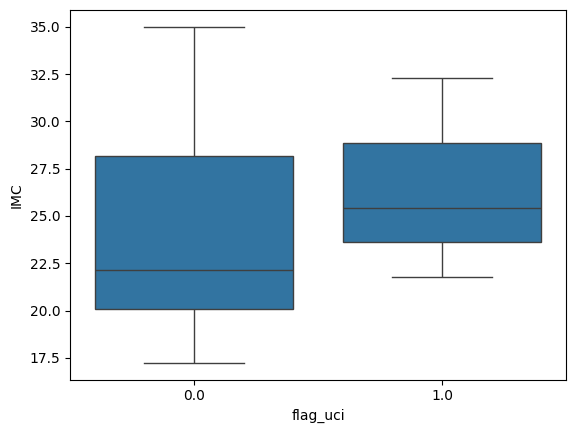

In [18]:
import seaborn as sns
sns.boxplot(data_final,y='IMC',x='flag_uci')


<Axes: xlabel='flag_uci', ylabel='IMC'>

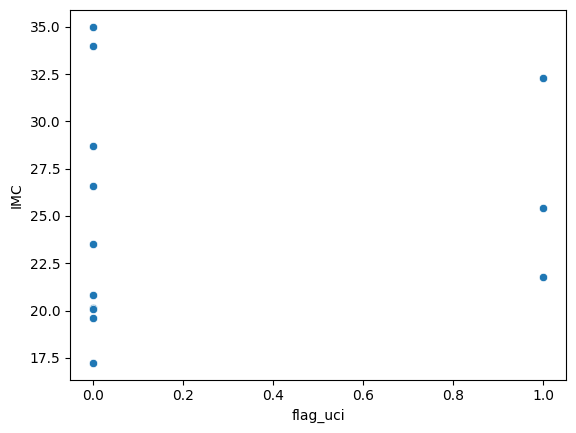

In [16]:
import seaborn as sns
sns.scatterplot(data_final,y='IMC',x='flag_uci')